In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#df=pd.read_csv('exoplanet.eu_catalog.csv') 

In [ ]:
import pyvo

service = pyvo.dal.TAPService("http://voparis-tap-planeto.obspm.fr/tap")

query = "SELECT * FROM exoplanet.epn_core WHERE semi_major_axis < 5"

results = service.search(query) 

df=pd.DataFrame(results)

for col in df.columns: 
    print(col) 

In [2]:
df=pd.read_csv('planets_2020.04.14_20.12.44.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (101) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df

,rowid,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_controvflag,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,...,st_bmvj,st_vjmic,st_vjmrc,st_jmh2,st_hmk2,st_jmk2,st_bmy,st_m1,st_c1,st_colorn
0,1,11 Com,b,11 Com b,Radial Velocity,0,1,326.030000,1.290000,0.2310,...,1.010,NaN,NaN,0.459,0.202,0.661,NaN,NaN,NaN,7
1,2,11 UMi,b,11 UMi b,Radial Velocity,0,1,516.219970,1.530000,0.0800,...,1.369,NaN,NaN,0.785,0.152,0.937,NaN,NaN,NaN,5
2,3,14 And,b,14 And b,Radial Velocity,0,1,185.840000,0.830000,0.0000,...,1.020,NaN,NaN,0.411,0.277,0.688,NaN,NaN,NaN,7
3,4,14 Her,b,14 Her b,Radial Velocity,0,1,1773.400020,2.930000,0.3700,...,0.880,NaN,NaN,0.355,0.089,0.444,0.537,0.366,0.438,9
4,5,16 Cyg B,b,16 Cyg B b,Radial Velocity,0,1,798.500000,1.660000,0.6800,...,0.660,NaN,NaN,0.298,0.044,0.342,0.418,0.222,0.351,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4139,4140,tau Gem,b,tau Gem b,Radial Velocity,0,1,305.500000,1.170000,0.0310,...,1.260,NaN,NaN,0.556,0.140,0.696,NaN,NaN,NaN,7
4140,4141,ups And,b,ups And b,Radial Velocity,0,3,4.617033,0.059222,0.0215,...,0.540,NaN,NaN,0.218,0.098,0.316,NaN,NaN,NaN,8
4141,4142,ups And,c,ups And c,Radial Velocity,0,3,241.258000,0.827774,0.2596,...,0.540,NaN,NaN,0.218,0.098,0.316,NaN,NaN,NaN,8
4142,4143,ups And,d,ups And d,Radial Velocity,0,3,1276.460000,2.513290,0.2987,...,0.540,NaN,NaN,0.218,0.098,0.316,NaN,NaN,NaN,8


In [4]:
#GJ273b=df.loc[df.target_name.astype(str)=='b\'tau Cet e\'']
tauCete=df.loc[df.pl_name=='tau Cet e']

In [5]:
tauCete.pl_bmassj*317.8

4135    3.931186
Name: pl_bmassj, dtype: float64

In [6]:
tauCete.st_spstr

4135    G8 V
Name: st_spstr, dtype: object

In [7]:
for col in df.columns: 
    print(col) 

rowid
pl_hostname
pl_letter
pl_name
pl_discmethod
pl_controvflag
pl_pnum
pl_orbper
pl_orbsmax
pl_orbeccen
pl_orbincl
pl_bmassj
pl_bmassprov
pl_radj
pl_dens
pl_ttvflag
pl_kepflag
pl_k2flag
pl_nnotes
ra_str
ra
dec_str
dec
st_dist
gaia_dist
st_optmag
st_optband
gaia_gmag
st_teff
st_mass
st_rad
rowupdate
pl_tranflag
pl_rvflag
pl_imgflag
pl_astflag
pl_omflag
pl_cbflag
pl_angsep
pl_orbtper
pl_orblper
pl_rvamp
pl_eqt
pl_insol
pl_massj
pl_msinij
pl_masse
pl_msinie
pl_bmasse
pl_rade
pl_rads
pl_trandep
pl_trandur
pl_tranmid
pl_tsystemref
pl_imppar
pl_occdep
pl_ratdor
pl_ratror
pl_def_reflink
pl_disc
pl_disc_reflink
pl_locale
pl_facility
pl_telescope
pl_instrument
pl_status
pl_mnum
pl_st_npar
pl_st_nref
pl_pelink
pl_edelink
pl_publ_date
hd_name
hip_name
st_rah
st_glon
st_glat
st_elon
st_elat
st_plx
gaia_plx
st_pmra
st_pmdec
st_pm
gaia_pmra
gaia_pmdec
gaia_pm
st_radv
st_sp
st_spstr
st_logg
st_lum
st_dens
st_metfe
st_metratio
st_age
st_vsini
st_acts
st_actr
st_actlx
swasp_id
st_nts
st_nplc
st_nglc


In [8]:
df.st_spstr

0       K0 III
1       K4 III
2       G8 III
3         K0 V
4       G2.5 V
         ...  
4139    K2 III
4140      F8 V
4141      F8 V
4142      F8 V
4143    G9 III
Name: st_spstr, Length: 4144, dtype: object

In [ ]:
df.st_spstr.unique()

In [9]:
idx=df['st_spstr'].str[0]=='M'
df=df[idx]

In [10]:
len(df)

281

In [11]:
idx_mass=-np.isnan(df.pl_bmassj)

In [12]:
df2=df[idx_mass]

In [13]:
df2['pl_bmasse']=df2.pl_bmassj*317.8
df2['rade']=df2.pl_radj*11.21

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
df2.pl_bmasse

10      7786.100000
11      4417.420000
12      2383.500000
13      1271.200000
15      6657.910000
           ...     
4092       3.409994
4093       7.700294
4104       0.750008
4105       0.978824
4106       1.140902
Name: pl_bmasse, Length: 165, dtype: float64

In [15]:
finaldf=df2.loc[ ((df2.pl_bmasse<5) & (df2.pl_bmasse>0.1)) | ((df2.rade<1.5) & (df2.rade>0.5))]

In [16]:
finaldf=finaldf.loc[ finaldf.pl_bmasse<10]

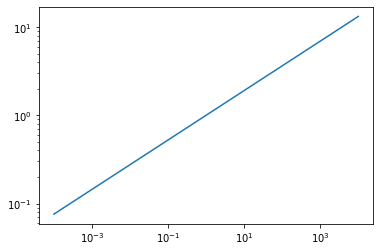

In [17]:
logmass=np.linspace(-4,4,1000)
mass=10**logmass
radius=mass**0.28
plt.loglog(mass,radius)

In [18]:
finaldf.pl_bmasse

139     1.369718
140     1.738366
141     1.639848
142     1.658916
143     2.640918
147     2.091124
150     3.028634
163     2.888802
164     1.179038
167     1.779680
168     4.179070
176     3.279696
177     2.021208
178     2.310406
182     1.840062
183     3.400460
188     2.469306
190     2.990498
201     1.684340
202     2.818886
205     3.813600
206     2.542400
207     2.542400
208     4.449200
212     4.449200
214     4.398352
1591    2.860200
1592    3.813600
1901    0.066738
1902    1.970360
1903    0.638778
3713    4.598566
3718    1.808282
3719    8.698186
3724    2.199176
3851    1.271200
3865    1.398320
3900    1.048740
3901    1.109122
4091    1.909978
4092    3.409994
4104    0.750008
4105    0.978824
4106    1.140902
Name: pl_bmasse, dtype: float64

In [19]:
finaldf=finaldf[-np.isnan(finaldf.pl_orbsmax)]
a=finaldf.pl_orbsmax
a

139     0.021000
140     0.035000
141     0.054000
142     0.015300
143     0.047600
147     0.009160
150     0.072000
163     0.091101
164     0.036467
167     0.019700
168     0.057000
176     0.082080
177     0.032820
178     0.126400
182     0.035000
183     0.061000
188     0.029000
190     0.078500
201     0.028150
202     0.078361
205     0.125000
206     0.213000
207     0.156000
208     0.549000
214     0.080000
3713    0.020910
3718    0.026750
3719    0.040400
3724    0.038070
3851    0.048500
3865    0.049600
3900    0.025200
3901    0.044300
4091    0.037500
4092    0.089000
4104    0.015570
4105    0.020900
4106    0.027640
Name: pl_orbsmax, dtype: float64

In [20]:
ang=finaldf.pl_angsep/1000
ang

139     0.005720
140     0.009530
141     0.014700
142     0.001210
143     0.003770
147     0.000449
150     0.020200
163     0.024000
164     0.009590
167     0.000691
168     0.002000
176     0.004060
177     0.006170
178     0.023800
182     0.003710
183     0.006460
188     0.001600
190     0.030800
201     0.004470
202     0.012100
205     0.018400
206     0.031300
207     0.022900
208     0.080700
214     0.016000
3713    0.000831
3718    0.001780
3719    0.001350
3724    0.005540
3851    0.037300
3865    0.014700
3900    0.006580
3901    0.011600
4091    0.008710
4092    0.020700
4104    0.004330
4105    0.005810
4106    0.007680
Name: pl_angsep, dtype: float64

In [21]:
implied_radius=finaldf.pl_bmasse**0.28
implied_radiusj=implied_radius/11.21
implied_radiusj

139     0.097421
140     0.104144
141     0.102456
142     0.102789
143     0.117081
147     0.109673
150     0.121659
163     0.120059
164     0.093416
167     0.104831
168     0.133136
176     0.124402
177     0.108634
178     0.112779
182     0.105815
183     0.125668
188     0.114899
190     0.121228
201     0.103227
202     0.119238
205     0.129768
206     0.115841
207     0.115841
208     0.135492
214     0.135057
3713    0.136750
3718    0.105300
3719    0.163469
3724    0.111231
3851    0.095406
3865    0.097986
3900    0.090403
3901    0.091831
4091    0.106926
4092    0.125767
4104    0.082302
4105    0.088673
4106    0.092560
Name: pl_bmasse, dtype: float64

In [22]:
R=finaldf.pl_radj
R[np.isnan(R)]=implied_radiusj[np.isnan(R)]

In [23]:
R

139     0.097421
140     0.104144
141     0.102456
142     0.102789
143     0.117081
147     0.106000
150     0.121659
163     0.120059
164     0.093416
167     0.104831
168     0.133136
176     0.124402
177     0.108634
178     0.112779
182     0.109000
183     0.125668
188     0.114899
190     0.121228
201     0.103227
202     0.119238
205     0.129768
206     0.115841
207     0.115841
208     0.135492
214     0.135057
3713    0.124000
3718    0.114000
3719    0.097000
3724    0.123000
3851    0.095406
3865    0.097986
3900    0.090403
3901    0.091831
4091    0.106926
4092    0.125767
4104    0.082302
4105    0.088673
4106    0.092560
Name: pl_radj, dtype: float64

In [24]:
R_au=R/2092.51
R_au

139     0.000047
140     0.000050
141     0.000049
142     0.000049
143     0.000056
147     0.000051
150     0.000058
163     0.000057
164     0.000045
167     0.000050
168     0.000064
176     0.000059
177     0.000052
178     0.000054
182     0.000052
183     0.000060
188     0.000055
190     0.000058
201     0.000049
202     0.000057
205     0.000062
206     0.000055
207     0.000055
208     0.000065
214     0.000065
3713    0.000059
3718    0.000054
3719    0.000046
3724    0.000059
3851    0.000046
3865    0.000047
3900    0.000043
3901    0.000044
4091    0.000051
4092    0.000060
4104    0.000039
4105    0.000042
4106    0.000044
Name: pl_radj, dtype: float64

In [25]:
C=0.4/np.pi*(R_au/a)**2

In [26]:
airy1=np.log10(1.22*1500e-9/25*206265)
airy1

-1.8210633778149077

In [27]:
airy2=np.log10(2.233*1500e-9/25*206265)
airy2

-1.5585344854182182

In [28]:
airy3=np.log10(3.23*1500e-9/25*206265)
airy3

-1.398220686158553

In [29]:
n=finaldf.pl_name

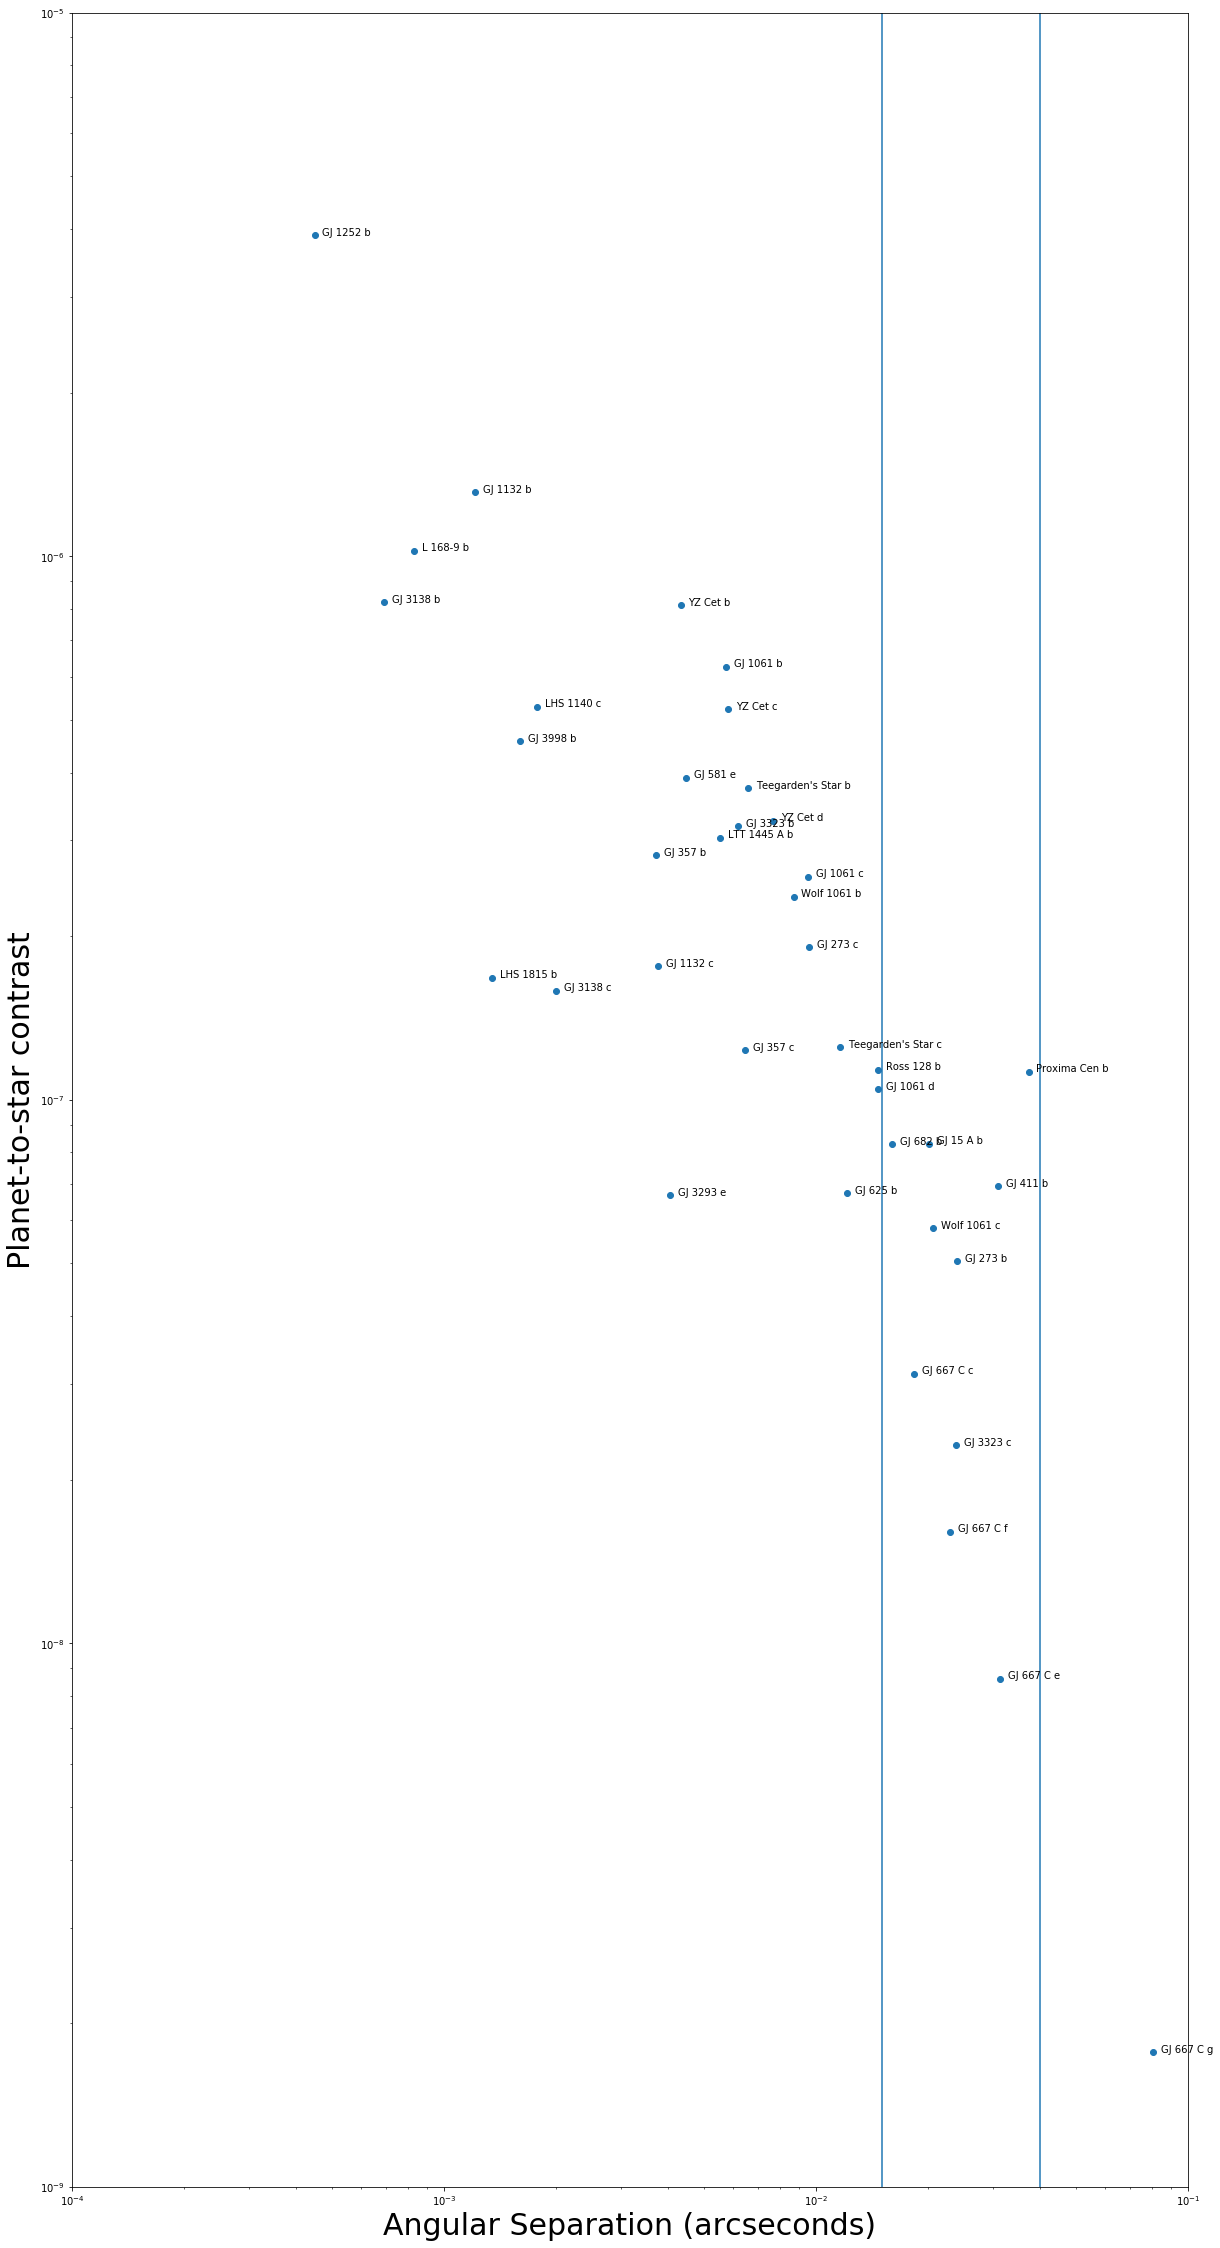

In [30]:
fig, ax = plt.subplots(figsize=(20, 40))
ax.scatter(ang,C)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([1e-4, 1e-1])
ax.set_ylim([1e-9, 1e-5])
ax.axvline(x=10**airy1)
ax.axvline(x=10**airy3)
ax.set_xlabel('Angular Separation (arcseconds)',fontsize=30)
ax.set_ylabel('Planet-to-star contrast',fontsize=30)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+point['x']/20, point['y'], str(point['val']))

label_point(ang, C, n, ax)


In [31]:
finaldf[np.log10(ang)>airy1].pl_name

150         GJ 15 A b
163          GJ 273 b
178         GJ 3323 c
190          GJ 411 b
205        GJ 667 C c
206        GJ 667 C e
207        GJ 667 C f
208        GJ 667 C g
214          GJ 682 b
3851    Proxima Cen b
4092      Wolf 1061 c
Name: pl_name, dtype: object

In [ ]:
finaldf.pl_name